In [2]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993284 sha256=ebc5b9d64d4e9735cfd57746b50f045ea63ed6e1e2ad38c0ba639b657b0b00f8
  Stored in directory: /Users/yunkaili/Library/Caches/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [1]:
# English language filtering for Community Notes
# This script filters the Community Notes dataset to keep only English notes

import pandas as pd
import numpy as np
from langdetect import detect, LangDetectException
import os
from tqdm.notebook import tqdm
import re

# Define file paths
input_filepath = "../raw/notes-00000.tsv"
output_filepath = "../english_only/english_notes-00000.tsv"

# Create output directory if it doesn't exist
os.makedirs(os.path.dirname(output_filepath), exist_ok=True)

In [2]:
# Function to detect language with error handling
def detect_language(text):
    try:
        # Check if text is NaN or empty
        if pd.isna(text) or text.strip() == '':
            return 'unknown'
        
        # Clean text - remove URLs, mentions, hashtags and special characters
        cleaned_text = re.sub(r'http\S+|@\S+|#\S+', '', text)
        cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
        
        if cleaned_text.strip() == '':
            return 'unknown'
            
        # Detect language
        return detect(cleaned_text)
    except LangDetectException:
        return 'unknown'

# Read the TSV file
print("Reading the TSV file...")
notes_df = pd.read_csv(input_filepath, sep='\t')

# Display basic information about the data
print(f"Total number of notes: {len(notes_df)}")
display(notes_df.head())
print(notes_df.columns.tolist())

# Check if 'summary' column exists
if 'summary' not in notes_df.columns:
    raise ValueError("The 'summary' column is not found in the dataset.")

# Detect language for each note's summary
print("Detecting language for each note's summary...")
tqdm.pandas()
notes_df['language'] = notes_df['summary'].progress_apply(detect_language)

Reading the TSV file...


/var/folders/r1/2mcrr6nx5hg7d13ln1lw2l5w0000gn/T/ipykernel_9664/2467192011.py:22: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  notes_df = pd.read_csv(input_filepath, sep='\t')


Total number of notes: 1750611


,noteId,noteAuthorParticipantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,...,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary,isMediaNote
0,1783179305159200982,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978050878,1783159712986382830,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,The House failed to pass a border protection l...,0
1,1783181538789605871,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978583415,1783171851818021181,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,1,0,0,0,0,0,0,1,The United States has 50 States https://da...,0
2,1783182562279494134,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978827435,1783154445682979015,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,TikTok only mentions “ban” and chooses to igno...,0
3,1883711635770196070,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1737946826294,1883619411774345444,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,1,0,...,0,0,0,0,0,0,0,1,This could be considered a threat https://...,0
4,1537142913737428992,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655318404027,1377030478167937024,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,1,0,0,0,0,0,0,1,Forbes has a good rundown of the investigation...,0


['noteId', 'noteAuthorParticipantId', 'createdAtMillis', 'tweetId', 'classification', 'believable', 'harmful', 'validationDifficulty', 'misleadingOther', 'misleadingFactualError', 'misleadingManipulatedMedia', 'misleadingOutdatedInformation', 'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact', 'misleadingSatire', 'notMisleadingOther', 'notMisleadingFactuallyCorrect', 'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire', 'notMisleadingPersonalOpinion', 'trustworthySources', 'summary', 'isMediaNote']
Detecting language for each note's summary...


  0%|          | 0/1750611 [00:00<?, ?it/s]

In [3]:
# Display language distribution
language_counts = notes_df['language'].value_counts()
print("Language distribution:")
print(language_counts)

# Filter out non-English notes
english_notes_df = notes_df[notes_df['language'] == 'en']
print(f"Number of English notes: {len(english_notes_df)}")

# Save English notes to a new TSV file
print(f"Saving English notes to {output_filepath}...")
english_notes_df.to_csv(output_filepath, sep='\t', index=False)

print("Done!")

# Optional: Create a list of noteIds for English notes
# This will be useful for filtering other related files in step 1.b
english_note_ids = english_notes_df['noteId'].tolist()
np.save("../english_only/english_note_ids.npy", english_note_ids)
print(f"Saved {len(english_note_ids)} English note IDs to english_note_ids.npy")

Language distribution:
language
en         1115550
es          164101
ja          134087
pt           90819
fr           86228
de           46115
it           14533
pl           14293
tr           11348
nl           11150
he           10551
ar            5950
id            5417
fi            4879
ca            4323
vi            3690
cs            3640
sv            3091
hr            2098
fa            1919
af            1773
unknown       1549
no            1273
tl            1101
th             927
da             913
ru             899
el             854
ko             846
hi             807
sl             702
ro             641
et             623
sk             464
ur             459
cy             398
so             376
lt             327
hu             296
bg             251
sw             232
mk             196
lv             195
sq             173
zh-cn          167
ta             149
uk              50
mr              47
ml              44
zh-tw           41
ne              27

## visualization

In [4]:
# Create a pie chart to visualize language distribution in Community Notes
# This code should be run after language detection is completed

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Pie chart saved to ../english_only/language_distribution.png


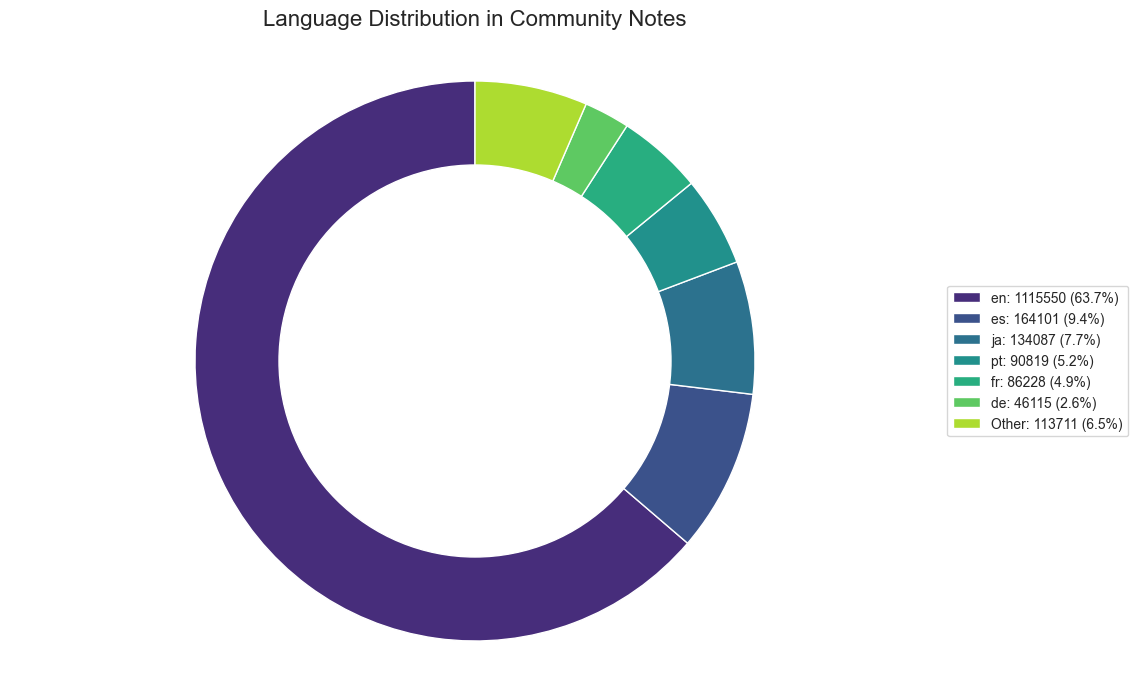

Total notes analyzed: 1750611
Number of different languages detected: 56
Percentage of English notes: 63.7%


In [5]:

# Set the style for better visualization
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Assuming notes_df with language column is already available from previous code
# If running separately, uncomment the following lines:
# input_filepath = "../raw/notes-00000.tsv"
# notes_df = pd.read_csv(input_filepath, sep='\t')
# notes_df['language'] = ... # language detection code

# Get language counts
language_counts = notes_df['language'].value_counts()

# For better visualization, group less frequent languages
# Define a threshold (e.g., languages that make up less than 1% of the data)
threshold = len(notes_df) * 0.01
major_languages = language_counts[language_counts >= threshold]
other_count = language_counts[language_counts < threshold].sum()

# Create a new Series with major languages and 'Other'
if other_count > 0:
    plot_data = pd.concat([major_languages, pd.Series({'Other': other_count})])
else:
    plot_data = major_languages

# Calculate percentages for labels
total = plot_data.sum()
plot_data_percent = (plot_data / total * 100).round(1)
labels = [f'{lang}: {count} ({percent}%)' for lang, count, percent in 
          zip(plot_data.index, plot_data.values, plot_data_percent.values)]

# Create a colormap
colors = sns.color_palette('viridis', len(plot_data))

# Create the pie chart
plt.pie(plot_data, labels=None, colors=colors, autopct='', startangle=90, shadow=False)

# Add a circle at the center to make it a donut chart (optional)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add legend
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))

# Add title and styling
plt.title('Language Distribution in Community Notes', fontsize=16, pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Save the figure
output_path = "../english_only/language_distribution.png"
plt.savefig(output_path, bbox_inches='tight', dpi=300)
print(f"Pie chart saved to {output_path}")

# Display the chart
plt.show()

# Print some statistics
print(f"Total notes analyzed: {len(notes_df)}")
print(f"Number of different languages detected: {len(language_counts)}")
print(f"Percentage of English notes: {plot_data_percent.get('en', 0)}%")